In [1]:
import pandas as pd
import numpy as np

In [141]:
data_21 = pd.read_csv("kusitms21_love.csv")
# data_22 = pd.read_csv("kusitms22_love.csv")

In [142]:
data_21.head()

,ID,학술제파트,직책,성별,나이,연애,스터디,카톡방,지역
0,1,개발,운영진,남,25,0,1,420,강북
1,2,개발,회원,여,23,0,0,10,강남
2,3,디자인,회원,여,21,0,2,22,강북
3,4,개발,회원,남,24,0,1,31,NaN
4,5,기획,회원,여,23,1,4,17,NaN


In [143]:
data_22.head()

,ID,학술제파트,직책,성별,나이,스터디,카톡방
0,1,디자인,회원,여,21,0,17
1,2,개발,운영진,남,22,1,232
2,3,기획,회원,남,24,3,2
3,4,개발,회원,여,23,4,15
4,5,기획,회원,여,21,1,17


In [4]:
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      80 non-null     int64 
 1   학술제파트   80 non-null     object
 2   직책      80 non-null     object
 3   성별      80 non-null     object
 4   나이      80 non-null     int64 
 5   연애      80 non-null     int64 
 6   스터디     80 non-null     int64 
 7   카톡방     80 non-null     int64 
 8   지역      7 non-null      object
dtypes: int64(5), object(4)
memory usage: 5.8+ KB


In [147]:
X_features = data_21[['나이', '스터디', '카톡방']]
y_label = data_21['연애']

In [148]:
X_features.shape, y_label.shape

((80, 3), (80,))

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.3, random_state = 22)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 22)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [151]:
y_pred = dt_clf.predict(X_test)

In [152]:
confusion_matrix(y_test, y_pred)

array([[19,  1],
       [ 1,  3]], dtype=int64)

In [153]:
accuracy_score(y_test, y_pred)

0.9166666666666666

In [154]:
y_label.unique()

array([0, 1], dtype=int64)

In [156]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names = y_label.unique().astype('str'), feature_names = X_features.columns, impurity=True, filled = True)

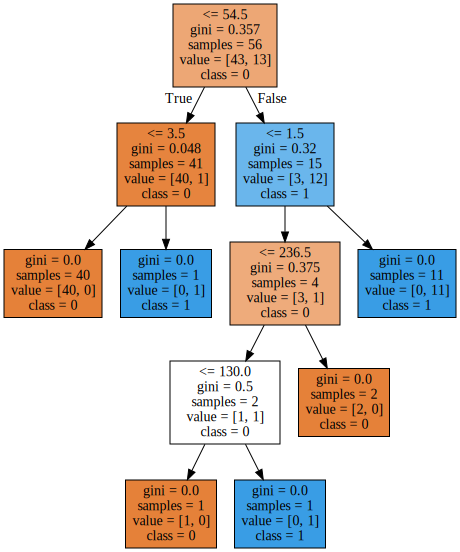

In [157]:
import graphviz

with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [160]:
# 그래프 작성 라이브러리 및 한글 폰트 지정을 위한 코드를 실행합니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   

나이 : 0.000
스터디 : 0.263
카톡방 : 0.737


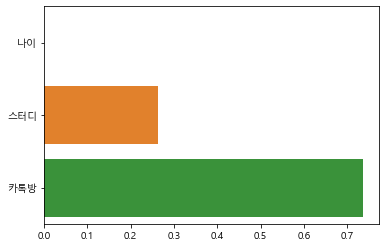

In [161]:
for name, value in zip(X_features.columns, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
sns.barplot(x=dt_clf.feature_importances_, y = X_features.columns)

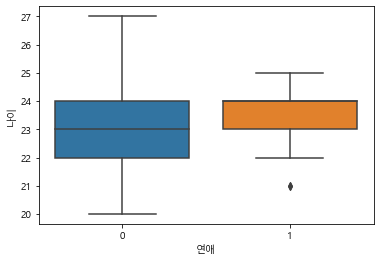

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.boxplot(data = data_21, x = '연애', y='나이')

In [93]:
love_0_age = data_21[data_21['연애'] == 0]['나이'].values
love_1_age = data_21[data_21['연애'] == 1]['나이'].values

In [95]:
len(love_0_age), len(love_1_age)

(63, 17)

In [96]:
from scipy import stats

two_sample = stats.ttest_ind(love_0_age, love_1_age)

In [97]:
print(two_sample)

Ttest_indResult(statistic=-0.8373810665050481, pvalue=0.4049368622284938)


In [98]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(two_sample))

t검정 통계량 = -0.837, pvalue = 0.405


## p-value > 0.05 귀무가설 (연애 x와 연애 o의 나이 평균은 같다)를 채택

In [100]:
print('연애 x :', np.mean(love_0_age))
print('연애 o :', np.mean(love_1_age))

연애 x : 23.142857142857142
연애 o : 23.470588235294116


# 실제로 찍어본 결과 평균값이 거의 ㅇ

## 본격 예측

In [101]:
# 21기 데이터를 죄다 모델에 학습

data_21

,ID,학술제파트,직책,성별,나이,연애,스터디,카톡방,지역
0,1,개발,운영진,남,25,0,1,420,강북
1,2,개발,회원,여,23,0,0,10,강남
2,3,디자인,회원,여,21,0,2,22,강북
3,4,개발,회원,남,24,0,1,31,NaN
4,5,기획,회원,여,23,1,4,17,NaN
...,...,...,...,...,...,...,...,...,...
75,76,기획,회원,여,25,0,1,18,NaN
76,77,디자인,운영진,남,24,0,1,28,NaN
77,78,개발,운영진,여,23,0,1,29,NaN
78,79,기획,운영진,여,23,1,2,723,강북


In [122]:
# 나이는 연관성이 없으니 제외 -> 이러면서 필요없는 피처 제거했다? 설명하면 좋을듯??
model_features = data_21[['스터디','카톡방']]
model_label = data_21['연애']

In [123]:
model_features

,스터디,카톡방
0,1,420
1,0,10
2,2,22
3,1,31
4,4,17
...,...,...
75,1,18
76,1,28
77,1,29
78,2,723


In [124]:
dt_clf = DecisionTreeClassifier(random_state = 22)

dt_clf.fit(model_features, model_label)

DecisionTreeClassifier(random_state=22)

In [125]:
data_22 = pd.read_csv("kusitms22_love.csv")

In [126]:
data_22

,ID,학술제파트,직책,성별,나이,스터디,카톡방
0,1,디자인,회원,여,21,0,17
1,2,개발,운영진,남,22,1,232
2,3,기획,회원,남,24,3,2
3,4,개발,회원,여,23,4,15
4,5,기획,회원,여,21,1,17
5,6,개발,운영진,여,23,1,210
6,7,기획,회원,여,24,0,31
7,8,개발,회원,여,22,0,12
8,9,디자인,회원,여,22,2,15
9,10,기획,회원,남,23,5,2


In [127]:
test_features = data_22[['스터디', '카톡방']]

In [136]:
data_22['연애'] = dt_clf.predict(test_features)

In [137]:
data_22

,ID,학술제파트,직책,성별,나이,스터디,카톡방,연애
0,1,디자인,회원,여,21,0,17,0
1,2,개발,운영진,남,22,1,232,0
2,3,기획,회원,남,24,3,2,0
3,4,개발,회원,여,23,4,15,1
4,5,기획,회원,여,21,1,17,0
5,6,개발,운영진,여,23,1,210,0
6,7,기획,회원,여,24,0,31,0
7,8,개발,회원,여,22,0,12,0
8,9,디자인,회원,여,22,2,15,0
9,10,기획,회원,남,23,5,2,1


In [139]:
data_22['연애'] = ["연애 한다" if x == 1 else "연애 못함" for x in data_22['연애']]

In [140]:
data_22

,ID,학술제파트,직책,성별,나이,스터디,카톡방,연애
0,1,디자인,회원,여,21,0,17,연애 못함
1,2,개발,운영진,남,22,1,232,연애 못함
2,3,기획,회원,남,24,3,2,연애 못함
3,4,개발,회원,여,23,4,15,연애 한다
4,5,기획,회원,여,21,1,17,연애 못함
5,6,개발,운영진,여,23,1,210,연애 못함
6,7,기획,회원,여,24,0,31,연애 못함
7,8,개발,회원,여,22,0,12,연애 못함
8,9,디자인,회원,여,22,2,15,연애 못함
9,10,기획,회원,남,23,5,2,연애 한다


In [ ]:
92 

In [162]:
data_22[['스터디', '카톡방']]

,스터디,카톡방
0,0,17
1,1,232
2,3,2
3,4,15
4,1,17
5,1,210
6,0,31
7,0,12
8,2,15
9,5,2
